In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [33]:
df = pd.read_csv("D:\\Matchine_Learning\\CampusX\\tutorial\\day75_classification_matrics_confusion_matrix\\Iris.csv")  # Kaggle file name

In [34]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df = df.iloc[:,1:]

In [36]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
df['Species'] = encoder.fit_transform(df['Species'])

In [40]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [42]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

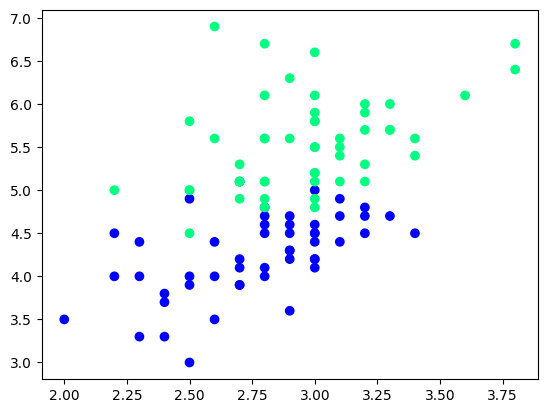

In [44]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [45]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
98,2.5,3.0,1
70,3.2,4.8,1
76,2.8,4.8,1
80,2.4,3.8,1
89,2.5,4.0,1
74,2.9,4.3,1
62,2.2,4.0,1
101,2.7,5.1,2
85,3.4,4.5,1


In [46]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [47]:
df_train

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
76,2.8,4.8,1
105,3.0,6.6,2
69,2.5,3.9,1
129,3.0,5.8,2
137,3.1,5.5,2
86,3.1,4.7,1
83,2.7,5.1,1
56,3.3,4.7,1
78,2.9,4.5,1


In [48]:
df_val

,SepalWidthCm,PetalLengthCm,Species
101,2.7,5.1,2
54,2.8,4.6,1
87,2.3,4.4,1
95,3.0,4.2,1
84,3.0,4.5,1


In [49]:
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
66,3.0,4.5,1
115,3.2,5.3,2
85,3.4,4.5,1
88,3.0,4.1,1


In [50]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [51]:
y_test

array([2, 1, 1, 1, 1])

# Case 1 - Bagging

In [52]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
78,2.9,4.5,1
125,3.2,6.0,2
137,3.1,5.5,2
69,2.5,3.9,1
86,3.1,4.7,1
129,3.0,5.8,2
76,2.8,4.8,1


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [54]:
dt_bag1 = DecisionTreeClassifier()

In [55]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    plt.show()
    y_pred = clf.predict(X_test)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

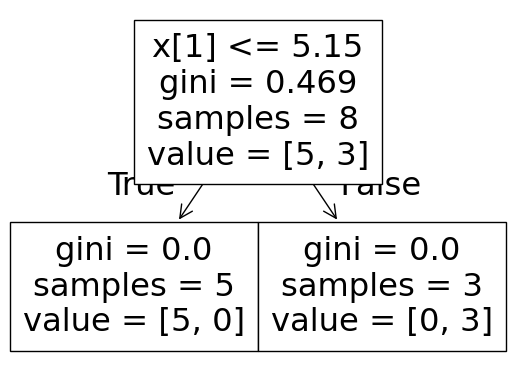

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


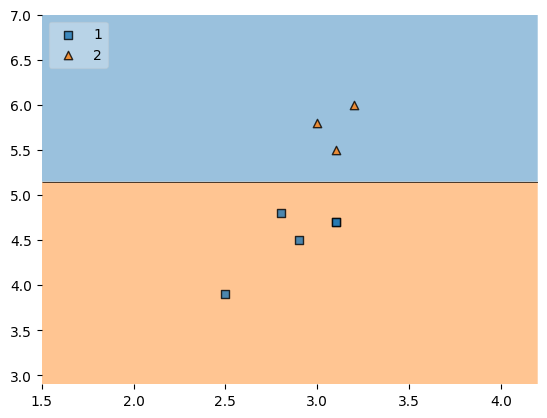

Accuracy Score: 0.8


d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [56]:
evaluate(dt_bag1,X,y)

In [57]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
69,2.5,3.9,1
78,2.9,4.5,1
125,3.2,6.0,2
78,2.9,4.5,1
125,3.2,6.0,2
86,3.1,4.7,1
56,3.3,4.7,1
83,2.7,5.1,1


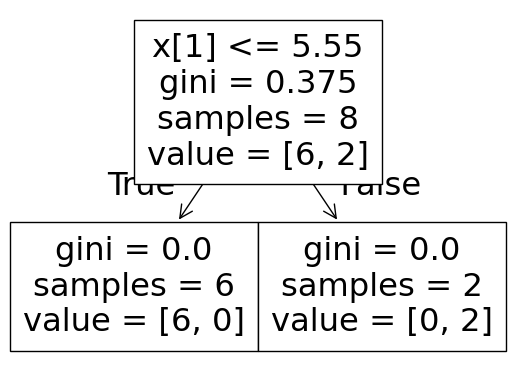

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


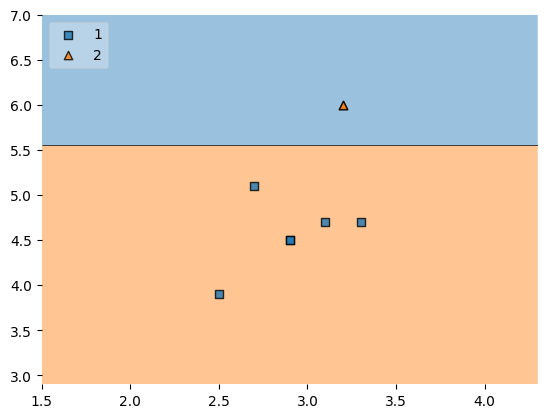

Accuracy Score: 0.8


d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [58]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [59]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
105,3.0,6.6,2
125,3.2,6.0,2
83,2.7,5.1,1
69,2.5,3.9,1
83,2.7,5.1,1
76,2.8,4.8,1
86,3.1,4.7,1


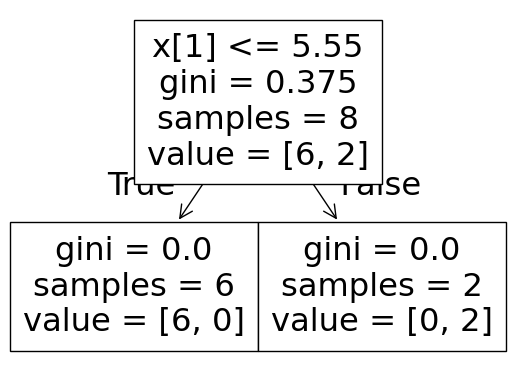

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


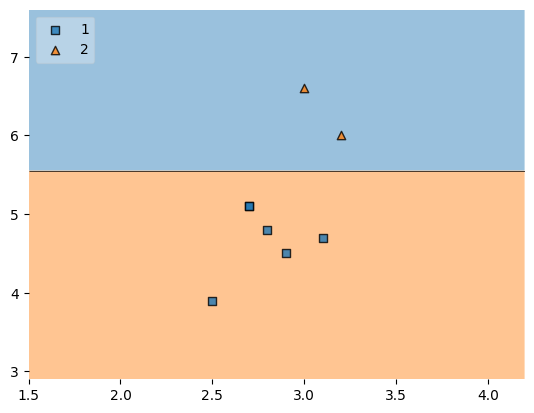

Accuracy Score: 0.8


d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [62]:
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
66,3.0,4.5,1
115,3.2,5.3,2
85,3.4,4.5,1
88,3.0,4.1,1


In [63]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [64]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
125,3.2,6.0,2
76,2.8,4.8,1
105,3.0,6.6,2
69,2.5,3.9,1
129,3.0,5.8,2
137,3.1,5.5,2
86,3.1,4.7,1
83,2.7,5.1,1
56,3.3,4.7,1
78,2.9,4.5,1


In [65]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
78,2.9,4.5,1
86,3.1,4.7,1
125,3.2,6.0,2
76,2.8,4.8,1
56,3.3,4.7,1
69,2.5,3.9,1
137,3.1,5.5,2
83,2.7,5.1,1


# Random Subspaces

In [67]:
df1 = pd.read_csv("D:\\Matchine_Learning\\CampusX\\tutorial\\day75_classification_matrics_confusion_matrix\\Iris.csv")  # Kaggle file name
df1 = df1.sample(10)

In [69]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [70]:
df1.sample(2,replace=True,axis=1)

,SepalLengthCm,SepalLengthCm
145,6.7,6.7
62,6.0,6.0
148,6.2,6.2
17,5.1,5.1
20,5.4,5.4
18,5.7,5.7
146,6.3,6.3
112,6.8,6.8
12,4.8,4.8
23,5.1,5.1


# Random Patches

In [71]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
148,149,6.2,3.4,5.4,2.3,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
20,21,5.4,3.4,1.7,0.2,Iris-setosa
18,19,5.7,3.8,1.7,0.3,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
12,13,4.8,3.0,1.4,0.1,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa


In [72]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,Species
145,6.7,Iris-virginica
23,5.1,Iris-setosa
18,5.7,Iris-setosa
12,4.8,Iris-setosa
62,6.0,Iris-versicolor
17,5.1,Iris-setosa
20,5.4,Iris-setosa
148,6.2,Iris-virginica
